### Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

### Function to generate high Resolution image and comparing with the lower resolution images

In [2]:
def run_and_plot_srcnn(model_path, lr_image_path, hr_image_path):
    model = load_model(model_path, compile=False)

    lr_img = cv2.imread(lr_image_path)
    lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)

    hr_img = cv2.imread(hr_image_path)
    hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB)

    h, w, _ = lr_img.shape
    lr_upscaled = cv2.resize(lr_img, (w * 4, h * 4), interpolation=cv2.INTER_CUBIC)

    input_img = lr_upscaled.astype('float32') / 255.0
    input_img = np.expand_dims(input_img, axis=0)

    pred = model.predict(input_img)[0]
    pred = np.clip(pred, 0, 1)
    sr_img = (pred * 255).astype('uint8')

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Bicubic Upsample")
    plt.imshow(lr_upscaled)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("SRCNN Output")
    plt.imshow(sr_img)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Original HR Image")
    plt.imshow(hr_img)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    
    diff = np.abs(sr_img - hr_img)
    plt.figure(figsize=(6, 6))
    plt.title("Difference Image")
    plt.imshow(diff)
    plt.axis("off")
    plt.show()

### Plotting the images

1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step


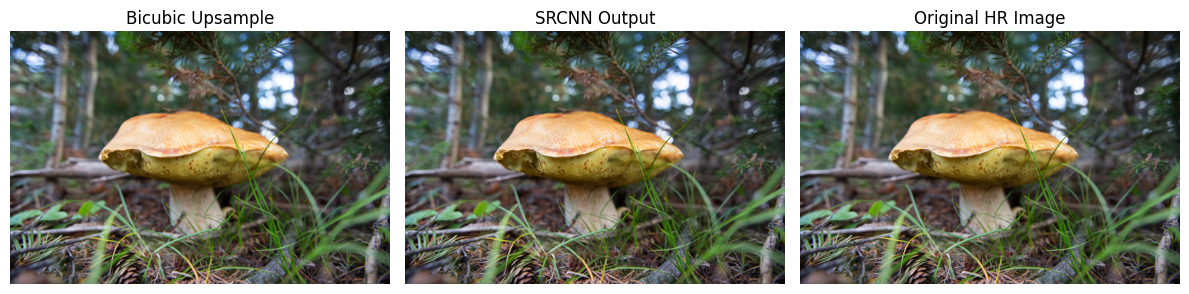

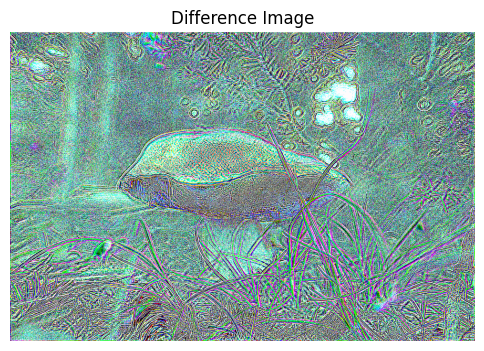

In [4]:
run_and_plot_srcnn(
    model_path="srcnn_custom_trained.h5",
    lr_image_path= "../DIV2K/valid_LR_X4/DIV2K_valid_LR_bicubic/X4/0815x4.png",
    hr_image_path= "../DIV2K/valid_HR/DIV2K_valid_HR/0815.png"
)